In [62]:
# Assignment 4 on Numpy:

# Write a function to find moving average in an array over a window,Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

import numpy as np

# from numpy import convolve
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
 
x = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] 
 
MA = movingaverage(x,3)
print (MA)

[  5.           4.66666667   5.66666667   6.66666667   9.66666667
  28.66666667  49.33333333  72.66666667  84.          93.33333333
 116.33333333]


In [63]:
# 2. Write a function so that the columns of the output matrix are powers of the input vector.

import numpy as np
x = np.array([1, 2, 3, 5])
N = 3
np.vander(x, N)
np.column_stack([x**(N-1-i) for i in range(N)])
x = np.array([1, 2, 3, 5])
np.vander(x)
np.vander(x, increasing=True)

array([[  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   5,  25, 125]])

In [64]:
# Assignment 5 on Pandas:

# Problem Statement - 1
# How-to-count-distance-to-the-previous-zero.For each value,count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position

import numpy as np
import pandas as pd
import os

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()
print(x)

0    1
1    2
2    2
3    3
4    4
5    5
6    6
7    6
8    7
9    8
Name: X, dtype: int32


In [65]:
# Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers

date_index = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
z = pd.Series(np.random.rand(len(date_index)), index=date_index)
print(z)

2015-01-01    0.897896
2015-01-02    0.659438
2015-01-05    0.478758
2015-01-06    0.726515
2015-01-07    0.726517
2015-01-08    0.395117
2015-01-09    0.083024
2015-01-12    0.921247
2015-01-13    0.361903
2015-01-14    0.746205
2015-01-15    0.232422
2015-01-16    0.186647
2015-01-19    0.631045
2015-01-20    0.864916
2015-01-21    0.139930
2015-01-22    0.227496
2015-01-23    0.273080
2015-01-26    0.231946
2015-01-27    0.704276
2015-01-28    0.856128
2015-01-29    0.107213
2015-01-30    0.343037
2015-02-02    0.021288
2015-02-03    0.181093
2015-02-04    0.875188
2015-02-05    0.607631
2015-02-06    0.969923
2015-02-09    0.503408
2015-02-10    0.502179
2015-02-11    0.043553
                ...   
2015-11-20    0.614369
2015-11-23    0.995230
2015-11-24    0.689943
2015-11-25    0.320854
2015-11-26    0.227217
2015-11-27    0.908175
2015-11-30    0.766250
2015-12-01    0.941371
2015-12-02    0.728317
2015-12-03    0.176372
2015-12-04    0.045459
2015-12-07    0.788459
2015-12-08 

In [66]:
# Find the sum of the values in s for every Wednesday 

z[date_index.weekday == 1].sum()

32.18600289015303

In [67]:
# Average For each calendar month 

z.resample('M').mean()

2015-01-31    0.490671
2015-02-28    0.563043
2015-03-31    0.535011
2015-04-30    0.337012
2015-05-31    0.583366
2015-06-30    0.555760
2015-07-31    0.510152
2015-08-31    0.654305
2015-09-30    0.485233
2015-10-31    0.703731
2015-11-30    0.624871
2015-12-31    0.403672
Freq: M, dtype: float64

In [68]:
# For each group of four consecutive calendar months in s, find the date on which the highest value occurred        

z.groupby(pd.TimeGrouper('4M')).idxmax()

C:\Users\Benny\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


2015-01-31   2015-01-12
2015-05-31   2015-03-19
2015-09-30   2015-07-21
2016-01-31   2015-11-23
dtype: datetime64[ns]

In [71]:
# Problem Statement - 2

import pandas as pd
baby_name = pd.read_csv(r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")
baby_name.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [72]:
# Delete unnamed columns 

baby_name.drop(["Unnamed: 0"], axis = 1, inplace = False)
# baby_name.drop(["Unnamed: 0"], axis = 1, inplace = True) # To permanently remove the column


,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41
5,11355,Abigail,2004,F,AK,37
6,11356,Olivia,2004,F,AK,33
7,11357,Isabella,2004,F,AK,30
8,11358,Alyssa,2004,F,AK,29
9,11359,Sophia,2004,F,AK,28


In [73]:
# Show the distribution of male and female

s1 = baby_name.groupby(['Gender']).count().reset_index()
baby_name['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [74]:
# Show the top 5 most preferred names 

baby_name1 = baby_name.groupby(['Name'])['Name'].agg(
    {"count": len}).sort_values("count", ascending=False).head(5).reset_index()
baby_name1

C:\Users\Benny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,Name,count
0,Riley,1112
1,Avery,1080
2,Jordan,1073
3,Peyton,1064
4,Hayden,1049


In [75]:
# What is the mode name occurrence in the dataset 

baby_name2 = baby_name.groupby(['Name'])['Name'].agg(
    {"count": len}).sort_values("count", ascending=False).head(1).reset_index()
baby_name2


C:\Users\Benny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,Name,count
0,Riley,1112


In [76]:
# Distribution of male and female born count by states 

s2 = baby_name.groupby(['Gender','State']).count().reset_index()
s2


,Gender,State,Unnamed: 0,Id,Name,Year,Count
0,F,AK,2404,2404,2404,2404,2404
1,F,AL,9878,9878,9878,9878,9878
2,F,AR,7171,7171,7171,7171,7171
3,F,AZ,14518,14518,14518,14518,14518
4,F,CA,45144,45144,45144,45144,45144
5,F,CO,11424,11424,11424,11424,11424
6,F,CT,6575,6575,6575,6575,6575
7,F,DC,3053,3053,3053,3053,3053
8,F,DE,2549,2549,2549,2549,2549
9,F,FL,25781,25781,25781,25781,25781


In [77]:
# Assignment 6 : TEST1 & REAL WORLD USECASES ON NUMPY & PANDAS

## Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as: 

import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


In [78]:
# Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size 

import numpy as np
a = np.array([1, 2, 3]) 
type(a)
try:  
    
    print("Second element is", a[1]) 
    print("Fourth element is", a[3])
  
except IndexError: 
    print("Array Out of Bound")
    

Second element is 2
Array Out of Bound


In [81]:
# Cipher
    
import numpy as np
class Cipher:
    L2I = dict(zip("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789",range(62)))
    I2L = dict(zip(range(62),"ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"))
    
    def __init__(self,Instr=""): 
        self.Instr=str(input("enter input string : "))

        
    def encrypt(self,key):
        ciphertext = ""
        Instr=self.Instr
        for c in Instr:
            if c.isalnum(): 
                ciphertext += self.I2L[ (self.L2I[c] + key) ]
            else: 
                ciphertext += c
        return ciphertext
    
    def decrypt(self,Enstr,key):
        plaintext2 = ""
        for c in Enstr:
            if c.isalnum(): plaintext2 += self.I2L[ (self.L2I[c] - key)]
            else: plaintext2 += c
        return plaintext2

k=np.random.randint(1,50,1)
key=k[0]
c=Cipher()
encryptstr=c.encrypt(key)
decryptstr=c.decrypt(encryptstr,key)
print("\n Input String is :\t"+c.Instr)
print("\nEncryption vaue of given string is :\t"+encryptstr)
print("\nDecryption vaue of given string is :\t"+decryptstr)

enter input string : abc

 Input String is :	abc

Encryption vaue of given string is :	678

Decryption vaue of given string is :	abc


In [82]:
# Get Data from the following link: 

import pandas as pd

#Read the dataset using pandas. 

ratings = pd.read_csv(r"C:\Users\Benny\Downloads\ml-20m (2)\ml-20m\ratings.csv")
tags = pd.read_csv(r"C:\Users\Benny\Downloads\ml-20m (2)\ml-20m\tags.csv")
movies = pd.read_csv(r"C:\Users\Benny\Downloads\ml-20m (2)\ml-20m\movies.csv")


In [87]:
# Extract the first row from tags and print its type.

tags.head(1)



,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


In [88]:
# Extract row 0, 11, 2000 from tags DataFrame

tags.iloc[[0,11,2000],[0,1,2,3]]
tags.iloc[[0,11,2000],:]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


In [91]:
# Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().

ratings['rating'].mean()


3.5

In [94]:
ratings['rating'].mode()


0    4.0
dtype: float64

In [95]:
ratings['rating'].count()


20000263

In [96]:
ratings['rating'].std()


1.051988919275684

In [97]:
ratings['rating'].min()


0.5

In [92]:
ratings['rating'].max()


5.0

In [93]:
ratings['rating'].median()


3.5

In [90]:
# Verify using describe().

ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [98]:
# Filter out ratings with rating > 5 

ratings[ratings['rating'] > 5] # this will give empty dataframe since highest rating is 5
ratings[ratings['rating'] > 4]

,userId,movieId,rating,timestamp
30,1,1196,4.5,1112484742
31,1,1198,4.5,1112484624
131,1,4993,5.0,1112484682
142,1,5952,5.0,1112484619
158,1,7153,5.0,1112484633
170,1,8507,5.0,1094786027
171,1,8636,4.5,1112485493
176,2,62,5.0,974820598
177,2,70,5.0,974820691
180,2,260,5.0,974821014


In [99]:
# Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.
# Need to execute each line seperately to check the results 

ratings.isnull().sum()
tags.isnull().sum()
tags.isnull().sum().sum()
movies.isnull().sum()
tags["tag"].fillna("No Tag", inplace = False) 

0                                               Mark Waters
1                                                 dark hero
2                                                 dark hero
3                                             noir thriller
4                                                 dark hero
5                                                 bollywood
6                                          screwball comedy
7                                             noir thriller
8                                                      mars
9                                                  neo-noir
10                                                    jesus
11                                            noir thriller
12                                                    jesus
13                                                   dragon
14                                        conspiracy theory
15                                                     mars
16                                      

In [100]:
# Filter out movies from the movies DataFrame that are of type 'Animation'

movies[movies['genres'] == 'Animation']
movies['genres'].str.contains('Animation').sum()

1027

In [101]:
# Find the average rating of movies. 

ratings["rating"].mean()

3.5255285642993797

In [102]:
# Perform an inner join of movies and tags based on movieId.

pd.merge(movies,tags, how = "inner", on = "movieId")

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2299,Pixar,1403306852
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,animation,1290312028
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,family,1290312032
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,Tom Hanks,1290312036
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6233,Pixar,1387079572


In [103]:
# Print out the 5 movies that belong to the Comedy genre and have rating greater than 4

combo = pd.merge(movies,ratings, how = "inner", on = "movieId") 
movies_ratings = combo[(combo['genres'] == 'Comedy') & (combo['rating'] > 4 )]
movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
87435,5,Father of the Bride Part II (1995),Comedy,117,5.0,861553146
87437,5,Father of the Bride Part II (1995),Comedy,127,5.0,847127740
87455,5,Father of the Bride Part II (1995),Comedy,350,5.0,1360209812
87460,5,Father of the Bride Part II (1995),Comedy,390,5.0,836139583
87462,5,Father of the Bride Part II (1995),Comedy,401,5.0,847049988


In [104]:
#  Split 'genres' into multiple columns. 

movies_1 = movies["genres"].str.split('|', n = 0, expand = True) 
movies_1

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [105]:
#  Extract year from title e.g. (1995)

movies2 = movies.title.str[-6:]
movies2

0        (1995)
1        (1995)
2        (1995)
3        (1995)
4        (1995)
5        (1995)
6        (1995)
7        (1995)
8        (1995)
9        (1995)
10       (1995)
11       (1995)
12       (1995)
13       (1995)
14       (1995)
15       (1995)
16       (1995)
17       (1995)
18       (1995)
19       (1995)
20       (1995)
21       (1995)
22       (1995)
23       (1995)
24       (1995)
25       (1995)
26       (1995)
27       (1995)
28       (1995)
29       (1995)
          ...  
27248    (1999)
27249    (2011)
27250    (2006)
27251    (1966)
27252    (1999)
27253    (2002)
27254    (1991)
27255    (2009)
27256    (2014)
27257    (2011)
27258    (2009)
27259    (2014)
27260    (2015)
27261    (2013)
27262    (2014)
27263    (2014)
27264    (2015)
27265    (2014)
27266    (2010)
27267    (2011)
27268    (2000)
27269    (2003)
27270    (2006)
27271    (2000)
27272    (2001)
27273    (2007)
27274    (2002)
27275    (2014)
27276    (2001)
27277    (2014)
Name: title, Length: 272

In [106]:
# Select rows based on timestamps later than 2015-02-01

from datetime import date
tags["date"]=tags.timestamp.apply(lambda x: pd.datetime.fromtimestamp(x).date())

tags['date1'] = pd.to_datetime(tags['date'])
testdate="2015-02-01"
dummy=(tags["date1"] > testdate)  
tags_new=tags.loc[dummy]
tags_new

,userId,movieId,tag,timestamp,date,date1
301,318,260,1970s,1424472169,2015-02-21,2015-02-21
302,318,260,fantasy,1424472169,2015-02-21,2015-02-21
303,318,260,sci-fi,1424472169,2015-02-21,2015-02-21
304,318,115149,Action,1424534310,2015-02-21,2015-02-21
305,318,115149,Revenge,1424534283,2015-02-21,2015-02-21
306,318,115149,Willem Dafoe,1424534383,2015-02-21,2015-02-21
324,342,318,masterplan,1423424898,2015-02-09,2015-02-09
326,342,318,prison escape,1423424898,2015-02-09,2015-02-09
327,342,318,redemption,1423424898,2015-02-09,2015-02-09
589,342,108190,based on a book,1426978115,2015-03-22,2015-03-22


In [107]:
# Sort the tags DataFrame based on timestamp

tags.sort_values(by='timestamp',ascending=True)

,userId,movieId,tag,timestamp,date,date1
333932,100371,2788,monty python,1135429210,2005-12-24,2005-12-24
333927,100371,1732,coen brothers,1135429236,2005-12-24,2005-12-24
333924,100371,1206,stanley kubrick,1135429248,2005-12-24,2005-12-24
333923,100371,1193,jack nicholson,1135429371,2005-12-24,2005-12-24
333939,100371,5004,peter sellers,1135429399,2005-12-24,2005-12-24
333922,100371,47,morgan freeman,1135429412,2005-12-24,2005-12-24
333921,100371,47,brad pitt,1135429412,2005-12-24,2005-12-24
333936,100371,4011,brad pitt,1135429431,2005-12-24,2005-12-24
333937,100371,4011,guy ritchie,1135429431,2005-12-24,2005-12-24
333920,100371,32,bruce willis,1135429442,2005-12-24,2005-12-24


Text(0, 0.5, 'Min and max temperature')

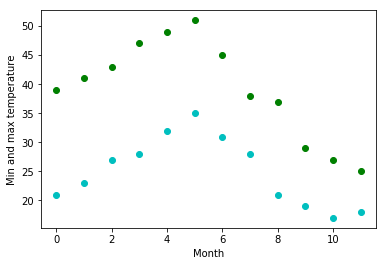

In [108]:
# Assignment 7 : MATPLOTLIB

# We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. Task:
# plot the fit Data Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

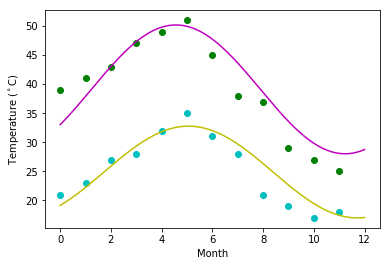

In [109]:
# Fitting it to a periodic function


from scipy import optimize
def  yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [114]:
## Matplotlib: This assignment is for visualization using matplotlib:

titanic = pd.read_csv(r"https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Fare paid and the Age')

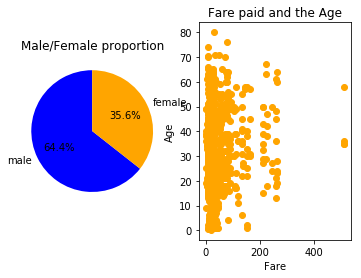

In [170]:
# Create a pie chart presenting the male/female proportion

count=titanic['sex'].value_counts()
colors = ['blue', 'orange']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,
        autopct='%.1f%%')
ax1.set_title('Male/Female proportion')

# Create a scatterplot with the Fare paid and the Age,differ the plot color by gender

colors = {'male':'blue', 'female':'orange'}
ax2.scatter(titanic.fare,titanic.age,c=titanic['sex'].iloc[:1].apply(lambda x: 
colors[x]))
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')

In [ ]:
# Assignment 8 on Pandas SQL is not applicable as it was removed from course 

In [116]:
# Assignment 9 : DATA CLEANING & REAL WORLD USE CASE ON DATA CLEANING

import numpy as np 
import pandas as pd 

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})
df


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [117]:
# 1.Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in
# place. Fill in these missing numbers and make the column an integer column.

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int) # Can use pd.to_numeric
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [118]:
# 2.The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with
# the correct values. Assign the correct column names to this temporary DataFrame.

new = df["From_To"].str.split("_", n = 1, expand = True)
new.columns = ['From', 'To']
df.drop(columns =["From_To"], inplace = False) 
df['From']=new['From']
df['To']=new['To']
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


In [119]:
# 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase
# uppercase (e.g. "londON" should become "London".)

new['From']=new.From.str.title()
new['To']=new.To.str.title()
new

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [120]:
# 4.Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

df1 = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})
df1

new1 = df1["From_To"].str.split("_", n = 1, expand = True)
new1.columns = ['From', 'To']
df1.drop(columns =["From_To"], inplace = True) 
df1['From']=new1['From']
df1['To']=new1['To']
df1

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),LoNDon,paris
1,NaN,[],<Air France> (12),MAdrid,miLAN
2,10065.0,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,NaN,[13],12. Air France,Budapest,PaRis
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,londOn


In [121]:
# 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each
# second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

df2 = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})
df2

delays=df2["RecentDelays"].apply(pd.Series)
delays
delays.columns=["delay_1","delay_2","delay_3"]
df2.drop(columns =["RecentDelays"], inplace = True) 
df2['delay_1']=delays['delay_1']
df2['delay_2']=delays['delay_2']
df2['delay_3']=delays['delay_3']
df2

,From_To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,LoNDon_paris,10045.0,KLM(!),23.0,47.0,NaN
1,MAdrid_miLAN,NaN,<Air France> (12),NaN,NaN,NaN
2,londON_StockhOlm,10065.0,(British Airways. ),24.0,43.0,87.0
3,Budapest_PaRis,NaN,12. Air France,13.0,NaN,NaN
4,Brussels_londOn,10085.0,"""Swiss Air""",67.0,32.0,NaN


In [124]:
# Assignment 10 : PROJECT - 2 & DATA WRANGLING ASSIGNMENT SUBMISSION

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r"https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.csv")
df.head(2)

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN


In [125]:
df1 =pd.read_csv(r"https://raw.githubusercontent.com/kjam/data-wrangling-pycon/master/data/berlin_weather_oldest.csv")
df1.head(2)

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,WDFG,PGTM,...,WT09,WT07,WT01,WT06,WT05,WT04,WT16,WT08,WT18,WT03
0,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310101,46,-9999,-9999,-9999,-11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310102,107,-9999,-9999,50,11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [126]:
# 1. Get the Metadata from the above files.

df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 12 columns):
Indicator                  4656 non-null object
PUBLISH STATES             4656 non-null object
Year                       4656 non-null int64
WHO region                 4656 non-null object
World Bank income group    4656 non-null object
Country                    4656 non-null object
Sex                        4656 non-null object
Display Value              4656 non-null int64
Numeric                    4656 non-null float64
Low                        0 non-null float64
High                       0 non-null float64
Comments                   0 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 436.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117208 entries, 0 to 117207
Data columns (total 21 columns):
STATION         117208 non-null object
STATION_NAME    117208 non-null object
DATE            117208 non-null int64
PRCP            117208 non-null i

In [127]:
# 2. Get the row names from the above files. 

row_names = df.index.values
row_names


array([   0,    1,    2, ..., 4653, 4654, 4655], dtype=int64)

In [128]:
row_names1 = df1.index.values
row_names1

array([     0,      1,      2, ..., 117205, 117206, 117207], dtype=int64)

In [129]:
# 3. Change the column name from any of the above file. 

df.rename(index=str, columns={"Indicator": "Indicator_Id"})

,Indicator_Id,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN
2,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Andorra,Female,28,28.0,NaN,NaN,NaN
3,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Andorra,Both sexes,23,23.0,NaN,NaN,NaN
4,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,United Arab Emirates,Female,78,78.0,NaN,NaN,NaN
5,Life expectancy at birth (years),Published,2000,Americas,High-income,Antigua and Barbuda,Male,72,72.0,NaN,NaN,NaN
6,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Antigua and Barbuda,Male,17,17.0,NaN,NaN,NaN
7,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Antigua and Barbuda,Both sexes,22,22.0,NaN,NaN,NaN
8,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Australia,Male,81,81.0,NaN,NaN,NaN
9,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Australia,Both sexes,80,80.0,NaN,NaN,NaN


In [130]:
# 4. Change the column name from any of the above file and store the changes made permanently. 

df1.rename(columns={'Station_ID':'STATION_ID'}, inplace=False)
df1

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,WDFG,PGTM,...,WT09,WT07,WT01,WT06,WT05,WT04,WT16,WT08,WT18,WT03
0,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310101,46,-9999,-9999,-9999,-11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310102,107,-9999,-9999,50,11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310103,-9999,-9999,-9999,28,11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310105,13,-9999,-9999,39,11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310106,-9999,-9999,-9999,0,-22,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
5,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310107,10,-9999,-9999,0,-22,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
6,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310108,13,-9999,-9999,11,-28,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
7,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310109,10,-9999,-9999,-22,-61,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
8,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310110,-9999,-9999,-9999,0,-39,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
9,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310112,-9999,-9999,-9999,22,-11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [131]:
# 5. Change the names of multiple columns. 

df.rename(columns={"PUBLISH STATES": "PUBLISH_STATES", "World Bank": "World_Bank"}, inplace = False)

,Indicator,PUBLISH_STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN
2,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Andorra,Female,28,28.0,NaN,NaN,NaN
3,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Andorra,Both sexes,23,23.0,NaN,NaN,NaN
4,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,United Arab Emirates,Female,78,78.0,NaN,NaN,NaN
5,Life expectancy at birth (years),Published,2000,Americas,High-income,Antigua and Barbuda,Male,72,72.0,NaN,NaN,NaN
6,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Antigua and Barbuda,Male,17,17.0,NaN,NaN,NaN
7,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Antigua and Barbuda,Both sexes,22,22.0,NaN,NaN,NaN
8,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Australia,Male,81,81.0,NaN,NaN,NaN
9,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Australia,Both sexes,80,80.0,NaN,NaN,NaN


In [132]:
# 6. Arrange values of a particular column in ascending order. 

df.sort_values(by=['Year'])


,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1270,Life expectancy at birth (years),Published,1990,Europe,High-income,Germany,Male,72,72.0,NaN,NaN,NaN
3193,Life expectancy at birth (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Male,65,65.0,NaN,NaN,NaN
3194,Life expectancy at birth (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Both sexes,68,68.0,NaN,NaN,NaN
3197,Life expectancy at age 60 (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Male,15,15.0,NaN,NaN,NaN
1264,Life expectancy at birth (years),Published,1990,Europe,High-income,Cyprus,Both sexes,76,76.0,NaN,NaN,NaN
3199,Life expectancy at age 60 (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Both sexes,17,17.0,NaN,NaN,NaN
1262,Life expectancy at age 60 (years),Published,1990,Western Pacific,High-income,Cook Islands,Male,17,17.0,NaN,NaN,NaN
1259,Life expectancy at birth (years),Published,1990,Western Pacific,High-income,Cook Islands,Male,67,67.0,NaN,NaN,NaN
3203,Life expectancy at age 60 (years),Published,1990,South-East Asia,Lower-middle-income,Maldives,Female,12,12.0,NaN,NaN,NaN


In [133]:
# 7. Arrange multiple column values in ascending order

df.sort_values(by=['Year','Country'])
df

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN
2,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Andorra,Female,28,28.0,NaN,NaN,NaN
3,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Andorra,Both sexes,23,23.0,NaN,NaN,NaN
4,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,United Arab Emirates,Female,78,78.0,NaN,NaN,NaN
5,Life expectancy at birth (years),Published,2000,Americas,High-income,Antigua and Barbuda,Male,72,72.0,NaN,NaN,NaN
6,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Antigua and Barbuda,Male,17,17.0,NaN,NaN,NaN
7,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Antigua and Barbuda,Both sexes,22,22.0,NaN,NaN,NaN
8,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Australia,Male,81,81.0,NaN,NaN,NaN
9,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Australia,Both sexes,80,80.0,NaN,NaN,NaN


In [134]:
# 8. Make country as the first column of the dataframe. 

x = df.columns 
df = df[['Country','Indicator', 'PUBLISH STATES', 'Year', 'WHO region','World Bank income group', 'Sex',
         'Display Value', 'Numeric','Low', 'High', 'Comments']]
df

,Country,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
0,Andorra,Life expectancy at birth (years),Published,1990,Europe,High-income,Both sexes,77,77.0,NaN,NaN,NaN
1,Andorra,Life expectancy at birth (years),Published,2000,Europe,High-income,Both sexes,80,80.0,NaN,NaN,NaN
2,Andorra,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,28,28.0,NaN,NaN,NaN
3,Andorra,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Both sexes,23,23.0,NaN,NaN,NaN
4,United Arab Emirates,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,Female,78,78.0,NaN,NaN,NaN
5,Antigua and Barbuda,Life expectancy at birth (years),Published,2000,Americas,High-income,Male,72,72.0,NaN,NaN,NaN
6,Antigua and Barbuda,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Male,17,17.0,NaN,NaN,NaN
7,Antigua and Barbuda,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Both sexes,22,22.0,NaN,NaN,NaN
8,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Male,81,81.0,NaN,NaN,NaN
9,Australia,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Both sexes,80,80.0,NaN,NaN,NaN


In [135]:
# 9. Get the column array using a variable 

x = df.columns 
x

Index(['Country', 'Indicator', 'PUBLISH STATES', 'Year', 'WHO region',
       'World Bank income group', 'Sex', 'Display Value', 'Numeric', 'Low',
       'High', 'Comments'],
      dtype='object')

In [136]:
# 10. Get the subset rows 11, 24, 37

y = df.iloc[[11, 24, 37]]
y

,Country,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
11,Austria,Life expectancy at birth (years),Published,2012,Europe,High-income,Female,83,83.0,NaN,NaN,NaN
24,Brunei Darussalam,Life expectancy at age 60 (years),Published,2012,Western Pacific,High-income,Female,21,21.0,NaN,NaN,NaN
37,Cyprus,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,26,26.0,NaN,NaN,NaN


In [137]:
# 11. Get the subset rows excluding 5, 12, 23, and 56

z = df.drop(df.index[[5,12,23,56]])
z

,Country,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
0,Andorra,Life expectancy at birth (years),Published,1990,Europe,High-income,Both sexes,77,77.0,NaN,NaN,NaN
1,Andorra,Life expectancy at birth (years),Published,2000,Europe,High-income,Both sexes,80,80.0,NaN,NaN,NaN
2,Andorra,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,28,28.0,NaN,NaN,NaN
3,Andorra,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Both sexes,23,23.0,NaN,NaN,NaN
4,United Arab Emirates,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,Female,78,78.0,NaN,NaN,NaN
6,Antigua and Barbuda,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Male,17,17.0,NaN,NaN,NaN
7,Antigua and Barbuda,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Both sexes,22,22.0,NaN,NaN,NaN
8,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Male,81,81.0,NaN,NaN,NaN
9,Australia,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Both sexes,80,80.0,NaN,NaN,NaN
10,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Both sexes,83,83.0,NaN,NaN,NaN


In [141]:
users = pd.read_csv(r"https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/users.csv") 
sessions = pd.read_csv(r"https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/sessions.csv") 
products = pd.read_csv(r"https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/products.csv") 
transactions = pd.read_csv(r"https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/transactions.csv")

users.head() 


,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1


In [142]:
sessions.head()


,SessionID,SessionDate,UserID
0,1,2010-01-05,2
1,2,2010-08-01,2
2,3,2010-11-25,2
3,4,2011-09-21,5
4,5,2011-10-19,4


In [143]:
transactions.head()

,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1


In [144]:
# 12. Join users to transactions, keeping all rows from transactions and only matching rows from users (left join)

df2 = pd.merge(users, transactions, how = "left", on = "UserID")
df2


,UserID,User,Gender,Registered,Cancelled,TransactionID,TransactionDate,ProductID,Quantity
0,1,Charles,male,2012-12-21,NaN,4.0,2012-08-26,2.0,3.0
1,2,Pedro,male,2010-08-01,2010-08-08,5.0,2013-06-06,4.0,1.0
2,2,Pedro,male,2010-08-01,2010-08-08,6.0,2013-12-23,5.0,6.0
3,3,Caroline,female,2012-10-23,2016-06-07,2.0,2011-05-26,4.0,1.0
4,3,Caroline,female,2012-10-23,2016-06-07,3.0,2011-06-16,3.0,1.0
5,3,Caroline,female,2012-10-23,2016-06-07,7.0,2013-12-30,4.0,1.0
6,3,Caroline,female,2012-10-23,2016-06-07,10.0,2016-05-08,4.0,4.0
7,4,Brielle,female,2013-07-17,NaN,NaN,NaN,NaN,NaN
8,5,Benjamin,male,2010-11-25,NaN,NaN,NaN,NaN,NaN


In [145]:
# 13. Which transactions have a UserID not in users?

transactions[~transactions["UserID"].isin(users["UserID"])]

,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
7,8,2014-04-24,NaN,2,3
8,9,2015-04-24,7.0,4,3


In [146]:
# 14. Join users to transactions, keeping only rows from transactions and users that match via UserID (inner join)

df3 = pd.merge(users, transactions, how = "inner", on = "UserID")
df3

,UserID,User,Gender,Registered,Cancelled,TransactionID,TransactionDate,ProductID,Quantity
0,1,Charles,male,2012-12-21,NaN,4,2012-08-26,2,3
1,2,Pedro,male,2010-08-01,2010-08-08,5,2013-06-06,4,1
2,2,Pedro,male,2010-08-01,2010-08-08,6,2013-12-23,5,6
3,3,Caroline,female,2012-10-23,2016-06-07,2,2011-05-26,4,1
4,3,Caroline,female,2012-10-23,2016-06-07,3,2011-06-16,3,1
5,3,Caroline,female,2012-10-23,2016-06-07,7,2013-12-30,4,1
6,3,Caroline,female,2012-10-23,2016-06-07,10,2016-05-08,4,4


In [147]:
# 15. Join users to transactions, displaying all matching rows AND all non-matching rows 

df4 = pd.merge(users, transactions, how = "outer", on = "UserID")
df4

,UserID,User,Gender,Registered,Cancelled,TransactionID,TransactionDate,ProductID,Quantity
0,1.0,Charles,male,2012-12-21,NaN,4.0,2012-08-26,2.0,3.0
1,2.0,Pedro,male,2010-08-01,2010-08-08,5.0,2013-06-06,4.0,1.0
2,2.0,Pedro,male,2010-08-01,2010-08-08,6.0,2013-12-23,5.0,6.0
3,3.0,Caroline,female,2012-10-23,2016-06-07,2.0,2011-05-26,4.0,1.0
4,3.0,Caroline,female,2012-10-23,2016-06-07,3.0,2011-06-16,3.0,1.0
5,3.0,Caroline,female,2012-10-23,2016-06-07,7.0,2013-12-30,4.0,1.0
6,3.0,Caroline,female,2012-10-23,2016-06-07,10.0,2016-05-08,4.0,4.0
7,4.0,Brielle,female,2013-07-17,NaN,NaN,NaN,NaN,NaN
8,5.0,Benjamin,male,2010-11-25,NaN,NaN,NaN,NaN,NaN
9,7.0,NaN,NaN,NaN,NaN,1.0,2010-08-21,2.0,1.0


In [148]:
df5 = pd.merge(users, sessions, how = "outer", on = "UserID")
df5
df5[df5["Registered"] == df5["SessionDate"]]

,UserID,User,Gender,Registered,Cancelled,SessionID,SessionDate
2,2,Pedro,male,2010-08-01,2010-08-08,2.0,2010-08-01
8,4,Brielle,female,2013-07-17,NaN,9.0,2013-07-17


In [150]:
# 17. Build a dataset with every possible (UserID, ProductID) pair 

users = pd.DataFrame({'key': np.repeat(1, users.shape[0]), 'UserID': users.UserID})
products = pd.DataFrame({'key': np.repeat(1, products.shape[0]), 'ProductID': products.ProductID})
user_products = pd.merge(users, products,on='key')[['UserID', 'ProductID']]
user_products

,UserID,ProductID
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,2,1
6,2,2
7,2,3
8,2,4
9,2,5


In [151]:
# 18.Determine how much quantity of each product was purchased by each user

pd.merge(user_products, transactions, how='left', on=['UserID', 'ProductID']).groupby(['UserID', 'ProductID']).apply(lambda x: pd.Series(dict(
    Quantity=x.Quantity.sum()
))).reset_index().fillna(0)

,UserID,ProductID,Quantity
0,1,1,0.0
1,1,2,3.0
2,1,3,0.0
3,1,4,0.0
4,1,5,0.0
5,2,1,0.0
6,2,2,0.0
7,2,3,0.0
8,2,4,1.0
9,2,5,6.0


In [152]:
# 19.For each user, get each possible pair of pair transactions (TransactionID1, TransacationID2) 

user_transactions = pd.merge(transactions, transactions, on='UserID')
user_transactions

,TransactionID_x,TransactionDate_x,UserID,ProductID_x,Quantity_x,TransactionID_y,TransactionDate_y,ProductID_y,Quantity_y
0,1,2010-08-21,7.0,2,1,1,2010-08-21,2,1
1,1,2010-08-21,7.0,2,1,9,2015-04-24,4,3
2,9,2015-04-24,7.0,4,3,1,2010-08-21,2,1
3,9,2015-04-24,7.0,4,3,9,2015-04-24,4,3
4,2,2011-05-26,3.0,4,1,2,2011-05-26,4,1
5,2,2011-05-26,3.0,4,1,3,2011-06-16,3,1
6,2,2011-05-26,3.0,4,1,7,2013-12-30,4,1
7,2,2011-05-26,3.0,4,1,10,2016-05-08,4,4
8,3,2011-06-16,3.0,3,1,2,2011-05-26,4,1
9,3,2011-06-16,3.0,3,1,3,2011-06-16,3,1


In [153]:
# 20. Join each user to his/her first occuring transaction in the transactions table

pd.merge(users, transactions.groupby('UserID').first().reset_index(), how='left', on='UserID')

,key,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,1,1,4.0,2012-08-26,2.0,3.0
1,1,2,5.0,2013-06-06,4.0,1.0
2,1,3,2.0,2011-05-26,4.0,1.0
3,1,4,NaN,NaN,NaN,NaN
4,1,5,NaN,NaN,NaN,NaN
